# I_Na : Sodium current

## 1.0 Setup

In [2]:
# Import packages and constants
import os
import sys 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'Python File')))

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from constants import Na_i, K_i, Ca_i, Na_o, K_o, Ca_o, g_BNa, g_BCa, g_BK, R, T, F 

# Constants
R = 8314.0  # mJ/mol K, Ideal gas constant
T = 295  # K, Absolute temperature
F = 96487.0  # C/mol, Faraday constant
Na_i = 1.073519e+01  # Intracellular sodium concentration in mM
Na_o = 140.0  # Extracellular sodium concentration in mM
g_Na = 0.8  # Maximum conductance for I_Na in µS
E_Na = (R * T / F) * np.log(Na_o / Na_i)  # Sodium equilibrium potential in mV


In [3]:
# Add here any state or other calculations that need to be performed before calculating the current
# Steady state values and time constants
def m_inf(V):
    return 1 / (1 + np.exp((V + 45.0) / -6.3))

def h_inf(V):
    return 1 / (1 + np.exp((V + 76.1) / 6.07))

def j_inf(V):
    return 1 / (1 + np.exp((V + 76.1) / 6.07))

def tau_m(V):
    return 0.00136 / (0.32 * (V + 47.13) / (1 - np.exp(-0.1 * (V + 47.13))) + 0.08 * np.exp(V / 11))

def tau_h(V):
    if V >= -40:
        return 0.0004537 * (1 + np.exp((V + 10.66) / 11.1))
    else:
        return 0.00349 / (0.135 * np.exp((V + 80.0) / -6.8) + 3.56 * np.exp((V + 25.0) / 50.0))

def tau_j(V):
    if V >= -40:
        return 0.0004537 * (1 + np.exp((V + 10.66) / 11.1))
    else:
        return 0.00349 / (0.135 * np.exp((V + 80.0) / -6.8) + 3.56 * np.exp((V + 25.0) / 50.0))

# Differential equations
def dm_dt(t, m, V):
    return (m_inf(V) - m) / tau_m(V)

def dh_dt(t, h, V):
    return (h_inf(V) - h) / tau_h(V)

def dj_dt(t, j, V):
    return (j_inf(V) - j) / tau_j(V)


# Create the function to calculate the current
def sodium_current(V, g_Na, E_Na):
    # Initial values
    m0 = 0.0
    h0 = 0.75
    j0 = 0.75

    # Time values
    end_time = 20
    t_span = (0, end_time)
    t_eval = np.linspace(0, end_time, 1000)

    # Solving the differential equations
    m_solution = solve_ivp(dm_dt, t_span, [m0], args=(V,), t_eval=t_eval, method='RK45')
    h_solution = solve_ivp(dh_dt, t_span, [h0], args=(V,), t_eval=t_eval, method='RK45')
    j_solution = solve_ivp(dj_dt, t_span, [j0], args=(V,), t_eval=t_eval, method='RK45')

    # Extract the values at each time step
    m_values = m_solution.y[0]
    h_values = h_solution.y[0]
    j_values = j_solution.y[0]

    # Compute I_Na at each time step and find the maximum value
    I_Na_values = g_Na * m_values**3 * h_values * j_values * (V - E_Na)
    I_Na_peak = np.max(I_Na_values)
    return I_Na_peak

## 2.0 Solving

In [6]:
V_range = np.linspace(-100, 50, 20)


### 2.1 Healthy Cell


In [7]:
diabetes = False

# Initialising array to hold the current values 
I_Na_values = []

# Solve for different values of v and calculate I 
for V in V_range:
    I_Na=  sodium_current(V, g_Na, E_Na)
    I_Na_values.append(I_Na)

### 2.2 Diabetes

In [149]:
diabetes = True

# Initialising arrays 
I_BNa_diabetic_values = []

for V in V_range:
    I_BNa_diabetic =  background_currents(V, g_BNa, E_Na, g_BK, E_K, g_BCa, E_CaL,diabetes)
    I_BNa_diabetic_values.append(I_BNa)

print(I_BNa_diabetic_values)

1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
1.62e-05
[2.2187752760154567, 2.2187752760154567, 2.2187752760154567, 2.2187752760154567, 2.2187752760154567,

## 3.0 Plotting

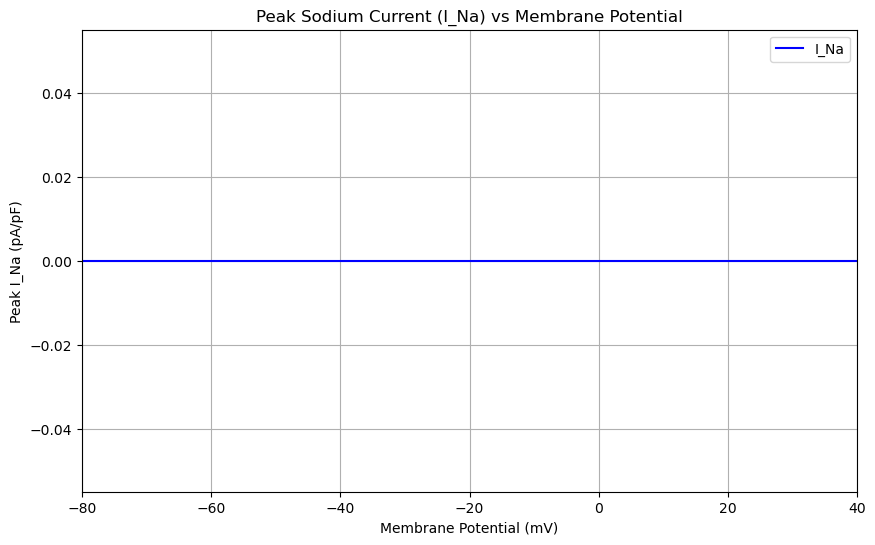

In [8]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(V_range, I_Na_values, label='I_Na', color='blue')
plt.xlim(-80, 40)
plt.xlabel('Membrane Potential (mV)')
plt.ylabel('Peak I_Na (pA/pF)')
plt.title('Peak Sodium Current (I_Na) vs Membrane Potential')
plt.legend()
plt.grid(True)
plt.show()
